Train accuracy: 0.01625
Test accuracy: 0.02


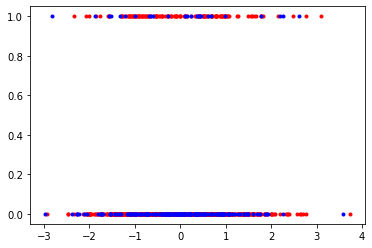

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# ================================= #
#
# Logistic regression
#
# ================================= #


def sigmoid(matrix: np.ndarray) -> np.ndarray:
    """
    :param matrix: Matrix on which sigmoid must be applied
    :return sigmoid_mat: Sigmoid applied on matrix entry-wise
    """
    return 1 / (1 + np.exp(-matrix))


def normalize_data(data: np.ndarray,
                   mean: np.ndarray = None,
                   std: np.ndarray = None) -> (np.ndarray, np.ndarray, np.ndarray):
    """
    :param data: (num_examples, num_features) Data matrix
    :param mean: (num_features, 1)  Data mean
    :param std: (num_features, 1) Data standard deviation
    :return normalized_data: (num_examples, num_features) Normalized data matrix
    :return mean: (num_features, 1) Mean used for normalizing
    :return std: (num_features, 1) Standard deviation used for normalizing
    """

    if mean is None:
        mean = data.mean(axis=0).reshape((-1, 1))

    if std is None:
        std = data.std(axis=0).reshape((-1, 1))

    normalized_data = data - np.repeat(mean.T, repeats=data.shape[0], axis=0)
    normalized_data = normalized_data / np.repeat(std.T, repeats=data.shape[0], axis=0)
    return normalized_data, mean, std


def predict(data: np.ndarray,
            weights: np.ndarray,
            bias: float) -> np.ndarray:
    """
    :param data: (num_examples, num_features) Data matrix
    :param weights: (num_features, 1) Weight vector
    :param bias: Scalar bias
    :return predictions: (num_examples, 1) Predicted target values
    """
    return sigmoid(np.matmul(data, weights) + bias)


def accuracy(targets: np.ndarray,
             predictions: np.ndarray) -> float:
    """
    :param targets: (num_examples, 1) Target labels
    :param predictions: (num_examples, 1) Predicted labels
    :return accuracy: Computed accuracy
    """
    return (targets == predictions).mean()


def train(data: np.ndarray,
          targets: np.ndarray,
          reg_param: float = 0.1,
          max_iters: int = 1000,
          lr: float = 0.1) -> (np.ndarray, float):
    """
    :param data: (num_examples, num_features) Data matrix
    :param targets: (num_examples, 1) Target values
    :param reg_param: Regularization parameter
    :param max_iters: Maximum number of iterations for gradient descent
    :param lr: Learning rate for gradient descent
    :return weights: (num_features, 1) Weight vector
    :return bias: Scalar bias
    """
    # Initialize the weights and bias
    w = np.random.normal(size=(data.shape[1], 1))
    b = 0

    # Learn the parameters using gradient descent
    for iter_idx in range(max_iters):
        predictions = predict(data, w, b)
        grad_w = (np.matmul(data.T, (predictions - targets)) + reg_param * w) / data.shape[0]
        grad_b = np.mean(predictions - targets)
        w = w - lr * grad_w
        b = b - lr * grad_b

        if np.linalg.norm(grad_w) + np.linalg.norm(grad_b) <= 0.001:
            break

    return w, b


if __name__ == '__main__':

    # Control variables
    num_examples = 1000
    num_features = 2

    # Initialize optimal w and b
    w_star = np.random.normal(size=(num_features, 1))
    b_star = np.random.normal()

    # Generate random data
    all_data = np.random.normal(size=(num_examples, num_features))
    all_targets = sigmoid(np.matmul(all_data, w_star) + b_star) >= 0.5

    # Split into train and test set
    all_indices = list(range(num_examples))
    np.random.shuffle(all_indices)
    train_indices = all_indices[:int(0.8 * num_examples)]
    test_indices = all_indices[int(0.8 * num_examples):]
    train_data = all_data[train_indices, :]
    train_targets = all_targets[train_indices, :]
    test_data = all_data[test_indices, :]
    test_targets = all_targets[test_indices, :]

    # Normalize the data
    normalized_train, data_mean, data_std = normalize_data(train_data)
    normalized_test, _, _ = normalize_data(test_data, data_mean, data_std)

    # Train the model
    w_hat, b_hat = train(normalized_train, train_targets)

    # Get predictions on train and test set
    train_preds = predict(normalized_train, w_hat, b_hat) >= 0.5
    #print("train preds", train_preds , "predicted " ,predict(normalized_train, w_hat, b_hat) )
    test_preds = predict(normalized_test, w_hat, b_hat) >= 0.5

    # Compute training and test accuracy
    train_accuracy = accuracy(train_targets, train_preds)
    test_accuracy = accuracy(test_targets, test_preds)
    print('Train accuracy:', train_accuracy)
    print('Test accuracy:', test_accuracy)

    plt.plot(normalized_train[:, 0], train_targets[:], 'r.')
    #plt.plot(train_data[:, 0], train_preds[:, 0], 'b.')
    plt.plot(normalized_test[:, 0], test_preds[:, 0], 'b.')
    plt.show()
